In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import pandas as pd
import numpy as np
import seaborn as sns

In [5]:
print(tf.__version__)

2.1.0


In [7]:
# Auto MPG Dataset
dataset_path = keras.utils.get_file("auto-mpg.data", "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

32768/30286 [================================] - 0s 5us/step


'C:\\Users\\최우석\\.keras\\datasets\\auto-mpg.data'

In [12]:
columns = ['mpg' , 'cylinders' , 'displacement' , 'horsepower', 'weight' , 'acceleration', 'model year', 'origin']

# skipInitalspace : 앞의 공백들을 없애준다.
raw_data = pd.read_csv(dataset_path, names = columns, sep = ' ', comment = '\t', skipinitialspace = True)
raw_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [95]:
dataset = raw_data.copy()
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
393,27.0,4,140.0,86.00,2790.0,15.6,82,1
394,44.0,4,97.0,52.00,2130.0,24.6,82,2
395,32.0,4,135.0,84.00,2295.0,11.6,82,1
396,28.0,4,120.0,79.00,2625.0,18.6,82,1
397,31.0,4,119.0,82.00,2720.0,19.4,82,1


In [96]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
dtypes: float64(4), int64(3), object(1)
memory usage: 25.0+ KB


In [97]:
dataset['origin'].unique()

array([1, 3, 2], dtype=int64)

In [98]:
dataset['horsepower'].unique()

array(['130.0', '165.0', '150.0', '140.0', '198.0', '220.0', '215.0',
       '225.0', '190.0', '170.0', '160.0', '95.00', '97.00', '85.00',
       '88.00', '46.00', '87.00', '90.00', '113.0', '200.0', '210.0',
       '193.0', '?', '100.0', '105.0', '175.0', '153.0', '180.0', '110.0',
       '72.00', '86.00', '70.00', '76.00', '65.00', '69.00', '60.00',
       '80.00', '54.00', '208.0', '155.0', '112.0', '92.00', '145.0',
       '137.0', '158.0', '167.0', '94.00', '107.0', '230.0', '49.00',
       '75.00', '91.00', '122.0', '67.00', '83.00', '78.00', '52.00',
       '61.00', '93.00', '148.0', '129.0', '96.00', '71.00', '98.00',
       '115.0', '53.00', '81.00', '79.00', '120.0', '152.0', '102.0',
       '108.0', '68.00', '58.00', '149.0', '89.00', '63.00', '48.00',
       '66.00', '139.0', '103.0', '125.0', '133.0', '138.0', '135.0',
       '142.0', '77.00', '62.00', '132.0', '84.00', '64.00', '74.00',
       '116.0', '82.00'], dtype=object)

In [100]:
# 데이터 정제
# 결측값 확인
dataset['horsepower'].replace('?', np.nan, inplace = True)
dataset.dropna(subset = ['horsepower'], axis = 0, inplace = True)
dataset['horsepower'] = dataset['horsepower'].astype('float')

In [101]:
dataset.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

In [102]:
dataset = dataset.dropna()

In [103]:
dataset.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1


In [104]:
dataset['origin'].unique()

array([1, 3, 2], dtype=int64)

In [105]:
# origin은 수치형이 아니고 범주형이므로 원-핫-인코딩을 통한 변환이 필요
# 1 == USA, 2 == Europe, 3 == Korea
origin = dataset.pop('origin')
dataset['usa'] = (origin == 1) * 1.0
dataset['europe'] = (origin == 2) * 2.0
dataset['korea'] = (origin == 3) * 3.0

In [106]:
dataset.tail()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
393,27.0,4,140.0,86.0,2790.0,15.6,82,1.0,0.0,0.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0.0,2.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1.0,0.0,0.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1.0,0.0,0.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,1.0,0.0,0.0


In [107]:
# 세트 분할
train_set = dataset.sample(frac = .8, random_state = 0)
test_set = dataset.drop(train_set.index)

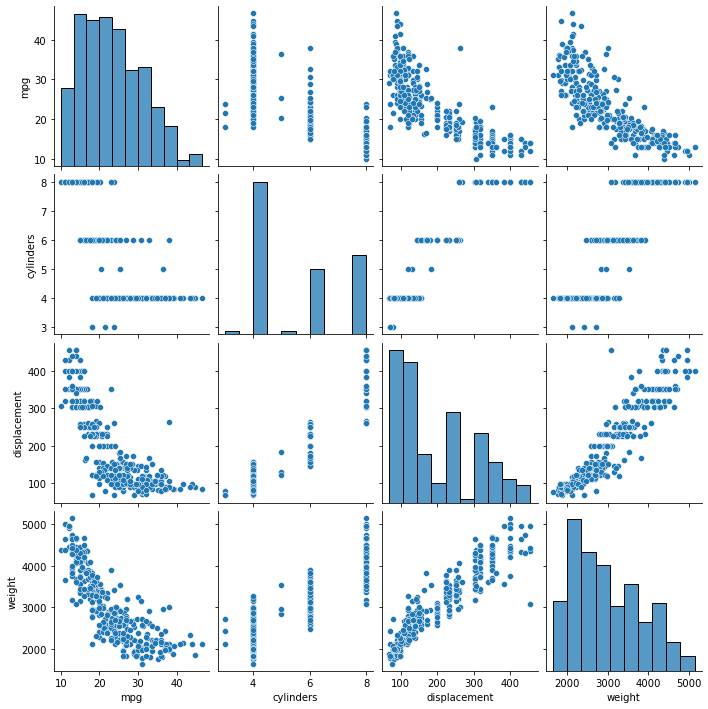

In [108]:
sns.pairplot(train_set[['mpg', 'cylinders', 'displacement', 'weight']])

In [109]:
train_stats = train_set.describe()
train_stats.pop('mpg')
train_stats = train_stats.transpose()

In [110]:
y_train = train_set.pop('mpg')
y_test = test_set.pop('mpg')

In [111]:
test_set

,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
9,8,390.0,190.0,3850.0,8.5,70,1.0,0.0,0.0
25,8,360.0,215.0,4615.0,14.0,70,1.0,0.0,0.0
28,8,304.0,193.0,4732.0,18.5,70,1.0,0.0,0.0
31,4,113.0,95.0,2228.0,14.0,71,0.0,0.0,3.0
33,6,232.0,100.0,2634.0,13.0,71,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82,1.0,0.0,0.0
375,4,105.0,74.0,1980.0,15.3,82,0.0,2.0,0.0
382,4,108.0,70.0,2245.0,16.9,82,0.0,0.0,3.0
384,4,91.0,67.0,1965.0,15.7,82,0.0,0.0,3.0


In [112]:
# 데이터 정규화
def norm(x) :
    return (x - train_stats['mean']) / train_stats['std']

norm_train_set = norm(train_set)
norm_test_set = norm(test_set)

In [113]:
norm_test_set

,cylinders,displacement,horsepower,weight,acceleration,model year,usa,europe,korea
9,1.483887,1.865988,2.234620,1.018782,-2.530891,-1.604642,0.774676,-0.465148,-0.495225
25,1.483887,1.578444,2.890853,1.925289,-0.559020,-1.604642,0.774676,-0.465148,-0.495225
28,1.483887,1.041693,2.313368,2.063931,1.054328,-1.604642,0.774676,-0.465148,-0.495225
31,-0.869348,-0.789008,-0.259066,-0.903250,-0.559020,-1.332580,-1.286751,-0.465148,2.012852
33,0.307270,0.351586,-0.127819,-0.422150,-0.917542,-1.332580,0.774676,-0.465148,-0.495225
...,...,...,...,...,...,...,...,...,...
369,-0.869348,-0.798593,-0.442811,-0.705359,0.875068,1.660094,0.774676,-0.465148,-0.495225
375,-0.869348,-0.865687,-0.810302,-1.197124,-0.092942,1.660094,-1.286751,2.143005,-0.495225
382,-0.869348,-0.836932,-0.915299,-0.883106,0.480693,1.660094,-1.286751,-0.465148,2.012852
384,-0.869348,-0.999874,-0.994047,-1.214899,0.050467,1.660094,-1.286751,-0.465148,2.012852


In [115]:
# 모델 만들기
model = keras.Sequential()

# 최적화 모델 찾기
optimizer = tf.keras.optimizers.RMSprop()

# 학습 명령어
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

In [116]:
# 모델 만들기
model = keras.Sequential([
    layers.Dense(50, activation = 'relu', input_shape = [len(train_set.keys())]),
    layers.Dense(50, activation = 'relu'),
    layers.Dense(1)
])

# 최적화 모델 찾기
optimizer = tf.keras.optimizers.RMSprop()

# 학습 명령어
model.compile(loss = 'mse', optimizer = optimizer, metrics = ['mae', 'mse'])

In [117]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                500       
_________________________________________________________________
dense_10 (Dense)             (None, 50)                2550      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 51        
Total params: 3,101
Trainable params: 3,101
Non-trainable params: 0
_________________________________________________________________


In [120]:
sample_result = model.predict(norm_train_set[:10])
# sample_result

In [121]:
# 모델 학습
class PrintDot(keras.callbacks.Callback) :
    def on_epoch_end(self, epoch, logs) :
        if epoch % 100 == 0 :
            print('') 
        print('.', end='')

# 훈련 정확도와 검증 정확도 : history
# epochs : 학습 훈련 횟수
history = model.fit(norm_train_set, y_train, epochs = 1000, validation_split = .2, verbose = 0, callbacks = [PrintDot()]) 


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [132]:
hist = pd.DataFrame(history.history)
hist

,loss,mae,mse,val_loss,val_mae,val_mse
0,576.051031,22.723459,576.051025,576.998908,22.738382,576.998901
1,538.172077,21.925531,538.172058,539.536968,21.946423,539.536926
2,501.812067,21.134535,501.812073,498.905724,21.057890,498.905731
3,461.563860,20.221937,461.563873,453.387222,20.000275,453.387207
4,416.699444,19.146238,416.699463,403.197301,18.753376,403.197296
...,...,...,...,...,...,...
995,3.655370,1.248338,3.655370,8.541523,2.239584,8.541523
996,3.417045,1.197916,3.417045,8.765981,2.274857,8.765981
997,3.446246,1.219442,3.446246,8.515731,2.241560,8.515732
998,3.482593,1.227984,3.482593,8.402433,2.239635,8.402432


In [123]:
# 예측
loss, mae, mse = model.evaluate(norm_test_set, y_test, verbose = 1)
print('평균 절대 오차 :', mae)

78/78 [==============================] - 0s 71us/sample - loss: 6.7796 - mae: 2.0812 - mse: 6.7796
평균 절대 오차 : 2.0812163


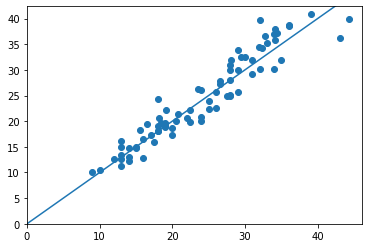

In [135]:
# 시각화
import matplotlib.pyplot as plt

y_pred = model.predict(norm_test_set).flatten() # 1차원으로 변형
# y_pred

plt.scatter(y_test, y_pred)
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])

_ = plt.plot([-100, 100], [-100, 100])

plt.show()